In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2905s 17us/step


In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [6]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [7]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
sgdHistory = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test), callbacks=[early_stopping], verbose=1)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
adamHistory = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test), callbacks=[early_stopping], verbose=1)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
rmspropHistory = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test), callbacks=[early_stopping], verbose=1)


Epoch 1/20
782/782 [==============================] - 145s 185ms/step - loss: 2.3163 - accuracy: 0.1886 - val_loss: 2.1180 - val_accuracy: 0.2770
Epoch 2/20
782/782 [==============================] - 143s 183ms/step - loss: 2.1090 - accuracy: 0.2824 - val_loss: 1.9546 - val_accuracy: 0.3695
Epoch 3/20
782/782 [==============================] - 153s 196ms/step - loss: 1.9588 - accuracy: 0.3403 - val_loss: 1.8212 - val_accuracy: 0.4097
Epoch 4/20
782/782 [==============================] - 146s 187ms/step - loss: 1.8495 - accuracy: 0.3792 - val_loss: 1.7802 - val_accuracy: 0.4084
Epoch 5/20
782/782 [==============================] - 145s 185ms/step - loss: 1.7679 - accuracy: 0.4086 - val_loss: 1.6183 - val_accuracy: 0.4695
Epoch 6/20
782/782 [==============================] - 145s 185ms/step - loss: 1.6895 - accuracy: 0.4333 - val_loss: 1.6424 - val_accuracy: 0.4523
Epoch 7/20
782/782 [==============================] - 144s 184ms/step - loss: 1.6197 - accuracy: 0.4583 - val_loss: 1.5738 -

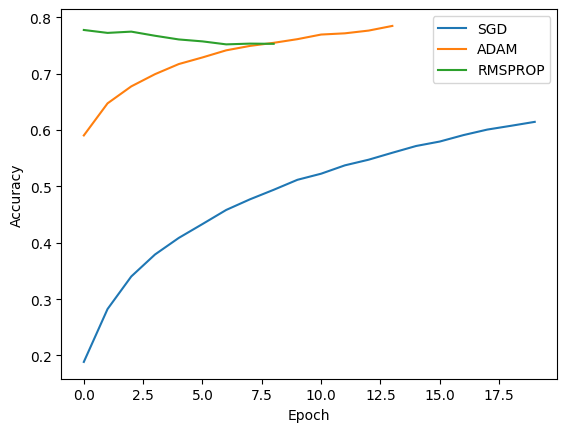

In [8]:
import matplotlib.pyplot as plt

plt.plot(sgdHistory.history['accuracy'], label='SGD')
plt.plot(adamHistory.history['accuracy'], label='ADAM')
plt.plot(rmspropHistory.history['accuracy'], label='RMSPROP')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()